In [23]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='white', context='talk', font_scale=1.5)

pca = 'imagenet'
regression = 'lin'
models = 'vvs'

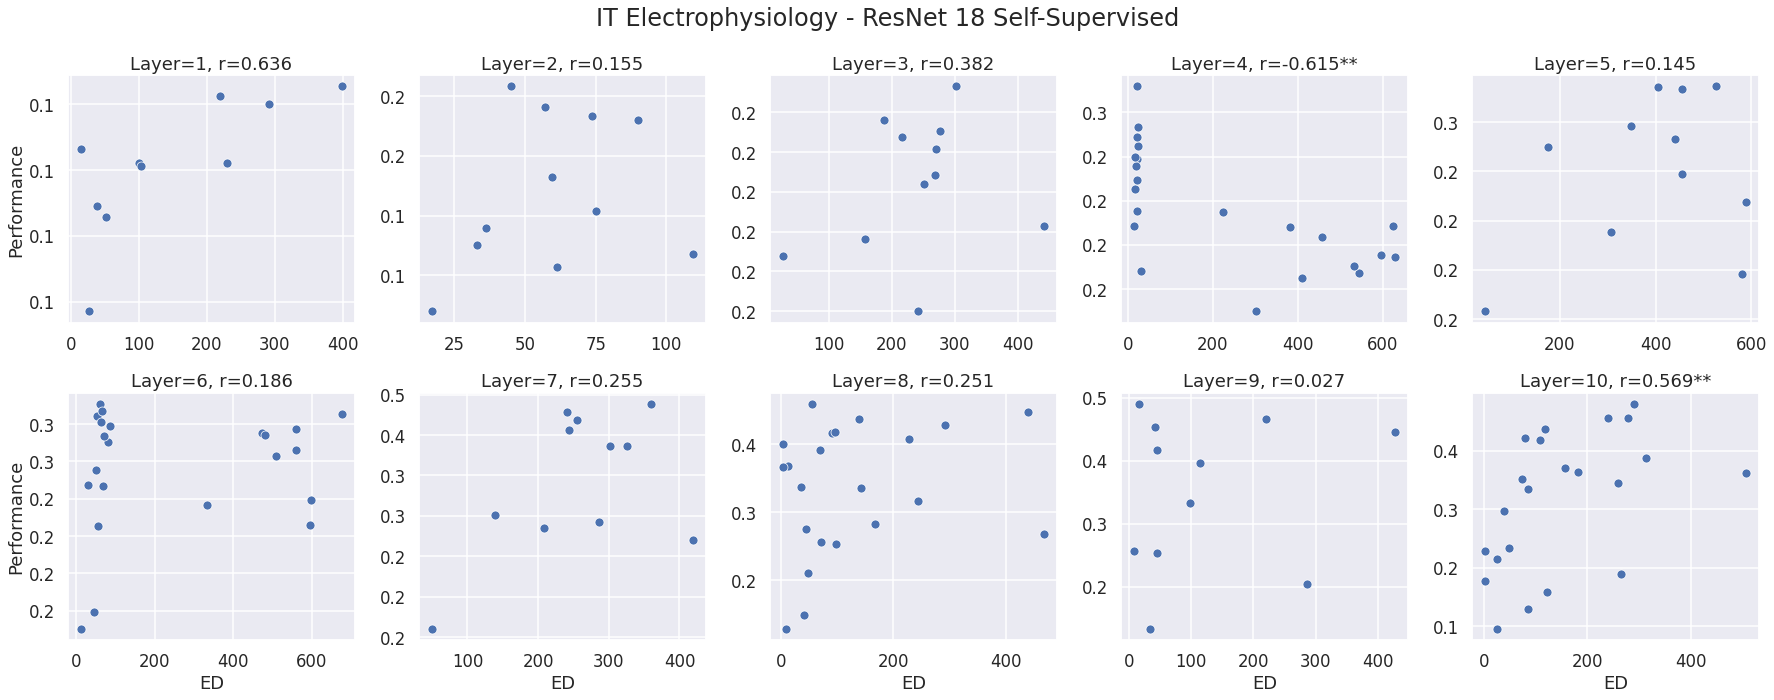

In [67]:
sns.set(context='talk')
from matplotlib.ticker import FormatStrFormatter

region = 'IT'
layers = [('encode_1.conv', 'relu'), ('encode_1', 'maxpool'), 
          ('encode_2', 'layer1.0.relu'), ('encode_3', 'layer1.1.relu'), 
          ('encode_4', 'layer2.0.relu'), ('encode_5', 'layer2.1.relu'), 
          ('encode_6', 'layer3.0.relu'), ('encode_7', 'layer3.1.relu'), 
          ('encode_8', 'layer4.0.relu'), ('encode_9', 'layer4.1.relu')]
results = results = pd.read_csv(f'../results/majajhong2015_{models}_{regression}.csv')
results = results[results.region == 'IT']

fig, axs = plt.subplots(2, 5, figsize=(25, 10))
for i, (tf_layer, pt_layer) in enumerate(layers):
    layer_results = results[(results.layer == tf_layer) | (results.layer == pt_layer)]
    r, p = stats.spearmanr(layer_results[f'effective_dimensionality_{pca}'], layer_results.score)
    if p < 0.0001:
        stars = '****'
    elif p < 0.001:
        stars = '***'
    elif p < 0.01:
        stars = '**'
    elif p < 0.03:
        stars = '*'
    else:
        stars = ''
    ax = axs[i // 5, i % 5]
    sns.scatterplot(x=f'effective_dimensionality_{pca}', y='score',
                    data=layer_results, ax=ax)
    ax.set_title(f'Layer={i + 1}, r={r:.3f}{stars}')
    if i // 5 == 1:
        ax.set_xlabel('ED')
    else:
        ax.set_xlabel('')
    if i % 5 == 0:
        ax.set_ylabel('Performance')
    else:
        ax.set_ylabel('')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.suptitle('IT Electrophysiology - ResNet 18 Self-Supervised', fontsize=24)
fig.tight_layout()
plt.savefig('/home/eric/Downloads/by_layer.jpg')
plt.show()

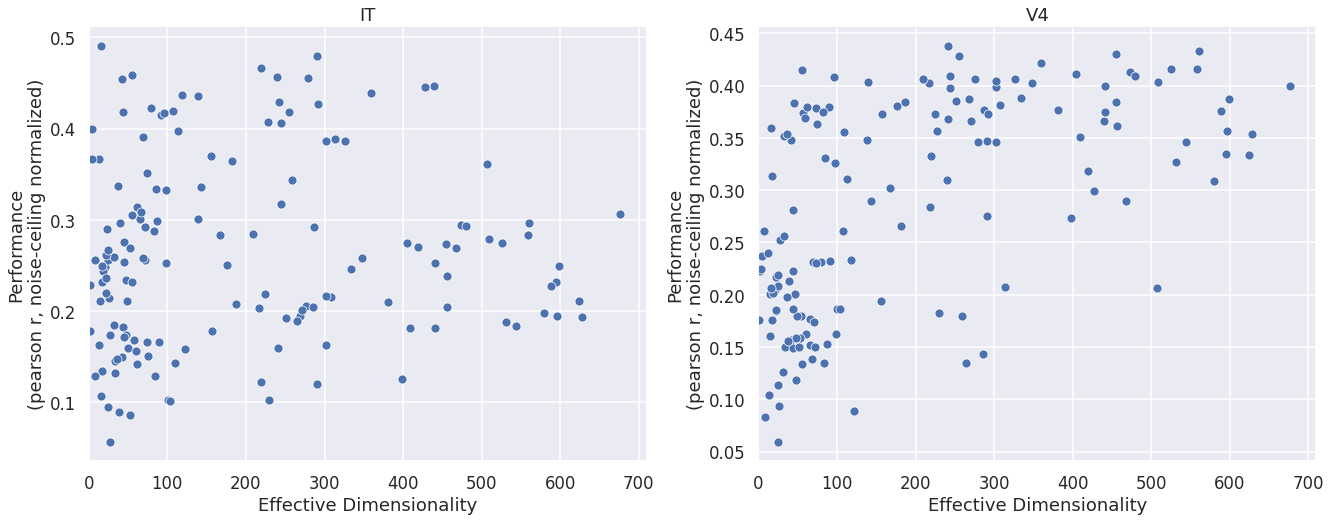

,Region,Effec. Dim. Set,Correlation,p-value
0,IT,ImageNet,0.141973,8.001813e-02
1,IT,Regressors,0.586567,1.626962e-15
2,V4,ImageNet,0.594662,5.298119e-16
3,V4,Regressors,0.017634,8.287129e-01


In [51]:
results = pd.read_csv(f'../results/majajhong2015_{models}_{regression}.csv')

fig, axs = plt.subplots(1, 2, figsize=(22, 8))

sns.scatterplot(x=f'effective_dimensionality_{pca}', y='score',
                data=results[results.region == 'IT'], ax=axs[0])
sns.scatterplot(x=f'effective_dimensionality_{pca}', y='score',
                data=results[results.region == 'V4'], ax=axs[1])

axs[0].set(xlabel='Effective Dimensionality', ylabel='Performance\n(pearson r, noise-ceiling normalized)', title='IT',
          xlim=(0, None))
axs[1].set(xlabel='Effective Dimensionality', ylabel='Performance\n(pearson r, noise-ceiling normalized)', title='V4',
          xlim=(0, None))

plt.show()

it = results[results.region == 'IT']
it_imagenet_r, it_imagenet_p = stats.spearmanr(it.effective_dimensionality_imagenet, it.score)
it_dataset_r, it_dataset_p = stats.spearmanr(it.effective_dimensionality_dataset, it.score)

v4 = results[results.region == 'V4']
v4_imagenet_r, v4_imagenet_p = stats.spearmanr(v4.effective_dimensionality_imagenet, v4.score)
v4_dataset_r, v4_dataset_p = stats.spearmanr(v4.effective_dimensionality_dataset, v4.score)

correlations = pd.DataFrame({'Region': ['IT', 'IT', 'V4', 'V4'], 
                             'Effec. Dim. Set': ['ImageNet', 'Regressors', 'ImageNet', 'Regressors'], 
                             'Correlation': [it_imagenet_r, it_dataset_r, v4_imagenet_r, v4_dataset_r], 
                             'p-value': [it_imagenet_p, it_dataset_p, v4_imagenet_p, v4_dataset_p]})

correlations

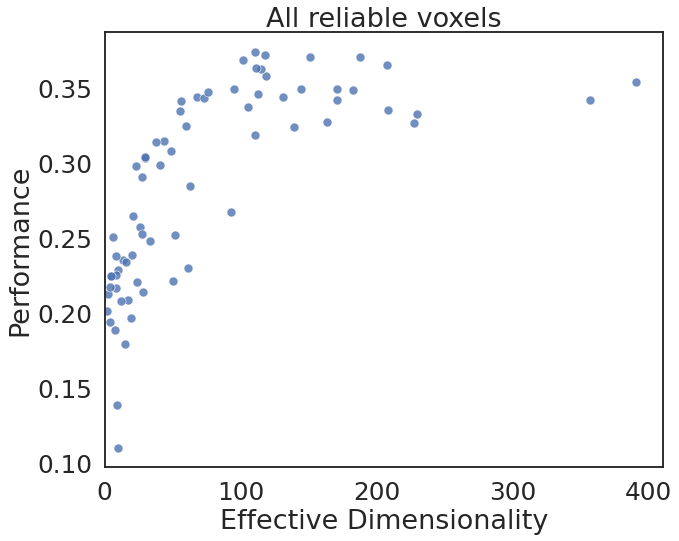

,Region,Effec. Dim. Set,Correlation,p-value
0,All reliable voxels,ImageNet,0.851073,5.525390e-21
1,All reliable voxels,Regressors,0.811301,9.624004e-18


In [3]:
results = pd.read_csv(f'../results/object2vec_{models}_{regression}.csv')
regions = 'All reliable voxels'

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x=f'effective_dimensionality_{pca}', y='score',
                data=results, ax=ax, 
                alpha=0.8)

ax.set(xlabel='Effective Dimensionality', ylabel='Performance', title=regions,
       xlim=(0, None))

plt.show()

imagenet_r, imagenet_p = stats.spearmanr(results.effective_dimensionality_imagenet, results.score)
dataset_r, dataset_p = stats.spearmanr(results.effective_dimensionality_dataset, results.score)

correlations = pd.DataFrame({'Region': [regions, regions], 
                             'Effec. Dim. Set': ['ImageNet', 'Regressors'], 
                             'Correlation': [imagenet_r, dataset_r], 
                             'p-value': [imagenet_p, dataset_p]})

correlations

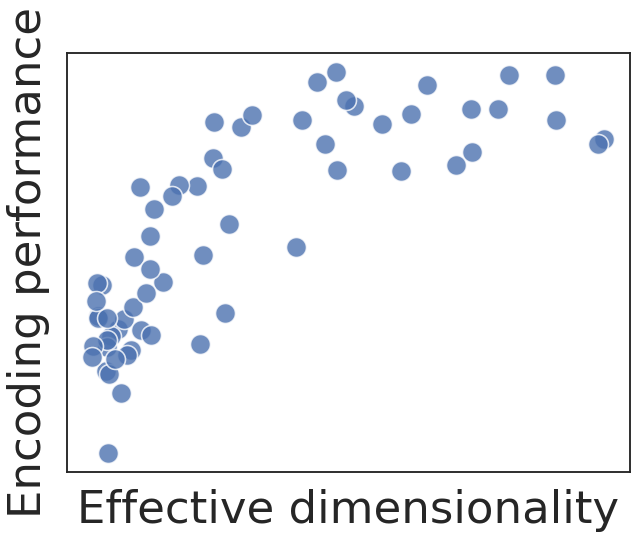

In [34]:
sns.set(style='white', context='talk', font_scale=2.5)

results = pd.read_csv(f'../results/object2vec_{models}_{regression}.csv')
results = results[~results.model.str.contains('barlow')]
regions = 'All reliable voxels'

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x=f'effective_dimensionality_{pca}', y='score',
                data=results, ax=ax, 
                alpha=0.8, s=400)

ax.set(xlabel='Effective dimensionality', ylabel='Encoding performance',
       xticklabels=[], yticklabels=[])

fig.tight_layout()
plt.savefig('/home/eric/Downloads/performance.png', transparent=True)
plt.show()